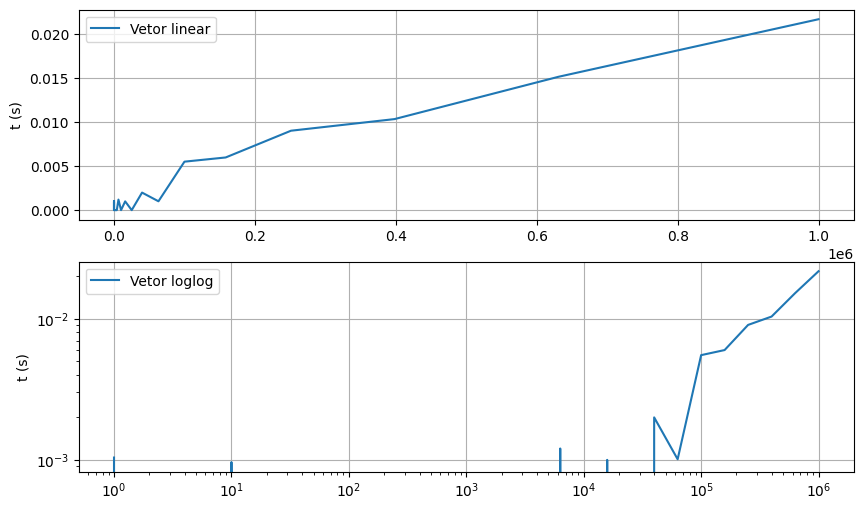

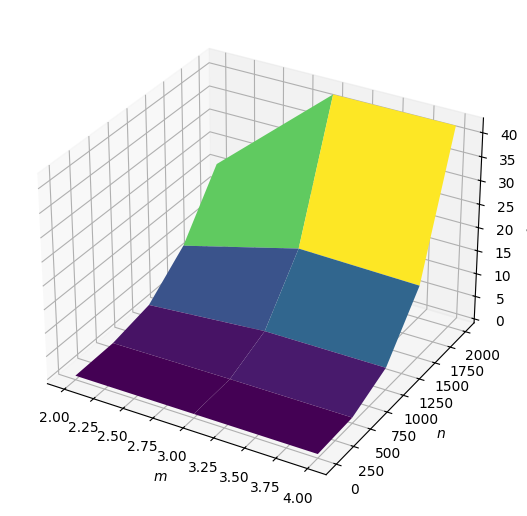

In [124]:
#Exercicio 1

import numpy as np
import time
import matplotlib.pyplot as plt

#Vetor
n = []
for i in np.arange(0, 6.1, 0.2):
    n.append(round(pow(10,i)))

t1 = []

for i in n:
    tempo = time.time()
    vecA = np.random.randint(100, size=(i), dtype=np.int64)
    vecB = np.random.randint(100, size=(i), dtype=np.int64)
    alpha = np.random.randint(100)
    beta = np.random.randint(100)
    vecC = vecA * alpha + vecB * beta
    t1.append(time.time() - tempo)

fig, ax = plt.subplots(2, figsize=(10, 6))

ax[0].plot(n,t1)
ax[0].legend(['Vetor linear'])
ax[0].grid()
ax[0].set_ylabel('t (s)')

ax[1].plot(n,t1)
ax[1].legend(['Vetor loglog'])
ax[1].grid()
ax[1].set_ylabel('t (s)')
ax[1].set_yscale('log')
ax[1].set_xscale('log')

#Matriz
m = [2,3,4]
n = np.arange(0, 2001, 500)
t2 = np.empty(shape=(len(n), len(m)))

for i in range(len(n)):
    for j in range(len(m)):
        tempo = time.time()
        matriz = np.random.randint(100, size=(n[i],n[i]), dtype=np.int64)
        matriz = np.linalg.matrix_power(matriz, m[j])
        t2[i][j] = time.time() - tempo
        
x = m
y = n
X,Y = np.meshgrid(x, y)
Z = t2

fig = plt.figure()
ax = plt.axes(projection="3d", facecolor='w')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor=None)
ax.set(xlabel="$m$", ylabel="$n$", zlabel="t(n, m)")

fig.set_figheight(8)

m = plt.cm.ScalarMappable(cmap='viridis')
m.set_array(Z)
plt.show()

#Conclusões:
#Em relação ao primeiro ponto, o do vetor, a escala dos vetores acabou se mostrando não alterar tanto o tempo de processamento, 
#o qual manteve-se consistentemente curto. O que foi realmente afetado foi a memória RAM, a qual cresce de forma tão rápida que
#não foi possível calcular com 10^9 elementos
#Em relação ao segundo ponto, aqui a escala se mostrou consideravelmente importante para a velocidade. O tempo necessário entre 1500^2 e 2000^2
#elementos gerou uma diferença de tempo consideravelmente grande, chegando à variar entre alguns poucos segundos a mais de meio minuto. A potência
#também apresentou relevância, mas não tão significativa quanto o tamanho das matrizes.

Valores de a: [0.         0.1025641  0.20512821 0.30769231 0.41025641 0.51282051
 0.61538462 0.71794872 0.82051282 0.92307692 1.02564103 1.12820513
 1.23076923 1.33333333 1.43589744 1.53846154 1.64102564 1.74358974
 1.84615385 1.94871795 2.05128205 2.15384615 2.25641026 2.35897436
 2.46153846 2.56410256 2.66666667 2.76923077 2.87179487 2.97435897
 3.07692308 3.17948718 3.28205128 3.38461538 3.48717949 3.58974359
 3.69230769 3.79487179 3.8974359  4.        ]

Feito na mão 
Medias:  [2.00000000e-05 2.20551749e-05 2.46268259e-05 2.79251061e-05
 3.22966434e-05 3.83552778e-05 4.73008615e-05 6.18439391e-05
 8.97372973e-05 1.67102595e-04 2.52661027e-02 1.13613608e-01
 1.87394614e-01 2.49854098e-01 3.03402443e-01 3.49816899e-01
 3.90432949e-01 4.26272774e-01 4.58131817e-01 4.86638263e-01
 5.12294773e-01 5.35508327e-01 5.56611947e-01 5.75880749e-01
 5.93543977e-01 6.09794153e-01 6.24794142e-01 6.38682614e-01
 6.51578007e-01 6.63575624e-01 6.62330988e-01 6.57128745e-01
 6.52267229e-01 6.47624838

(0.0, 4.0, 8.402029987697786e-08, 0.1368869842550307)

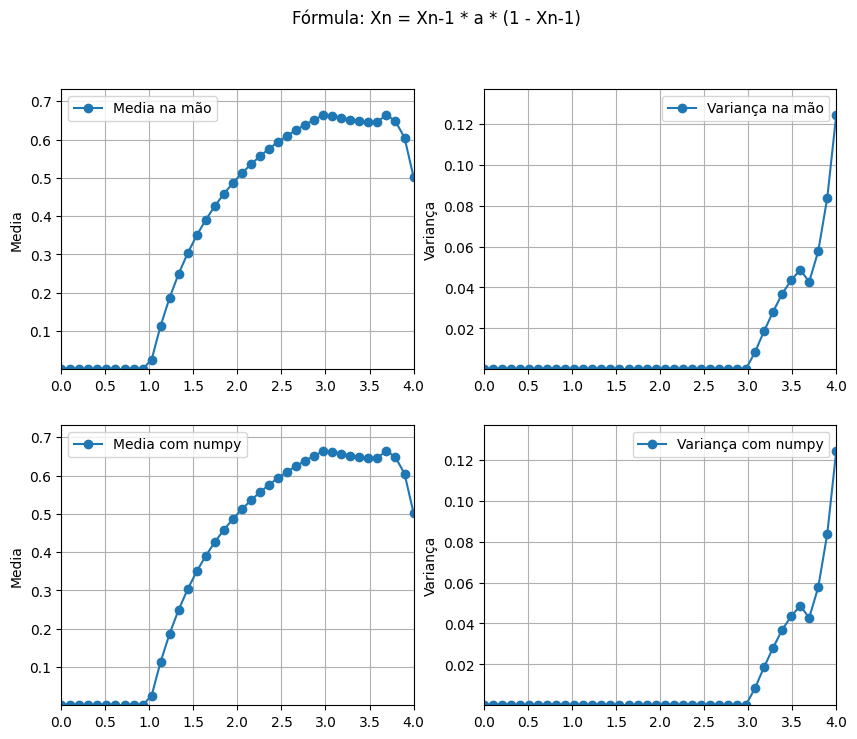

In [195]:
#Exercício 2
import numpy as np

N = 5000

a = np.linspace(0, 4, 40)
a = np.sort(a)
print("Valores de a:", a)

valores = np.empty(shape=(len(a), N))

for i in range(len(a)):
    valores[i][0] = 0.1

#Criar os valores
for j in range(len(a)):
    for i in range(1, N):
        valores[j][i] = a[j]*valores[j][i-1]*(1 - valores[j][i-1])

#Calculando na mão
media = np.zeros(shape=(len(a)))

for j in range(len(a)):
    for x in valores[j]:
        media[j] += x

media /= N

varianca = np.zeros(shape=(len(a)))

for j in range(len(a)):
    for x in valores[j]:
        varianca[j] += pow((x - media[j]),2)

varianca /= (N-1)

print("\nFeito na mão", "\nMedias: ", media, "\nVarianças: ", varianca)

#Calculando usando numpy
mediasNp = np.empty(shape=(len(a)))
for i in range(len(valores)):
    mediasNp[i] = np.mean(valores[i])

variancasNp = np.empty(shape=(len(a)))
for i in range(len(valores)):
    variancasNp[i] = np.var(valores[i], ddof=1)

print("\nFeito com numpy", "\nMedias: ", mediasNp, "\nVarianças: ", variancasNp)

print("\nDiferenca das medias (mão - numpy): ", media - mediasNp, "\nDiferenca das varianças (mão - numpy): ", varianca - variancasNp) 

#Conclusões:
#Os dois métodos se provaram eficazes em conseguir o resultado, embora haja uma minúscula diferença entre eles, provavelmente por conta
#da imprecisão do cálculo de casas decimais muito pequenas
#Em relação aos resultados da função, percebe-se que a média não é diretamente proporcional ao valor de 'a', uma vez que ele aumenta e volta a diminuir
#múltiplas vezes, assim como o valor da variança, no entanto esta varia de forma muito mais acentuada

#====================================================================================================================================

#Exercício 3
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(10, 8))

fig.suptitle("Fórmula: Xn = Xn-1 * a * (1 - Xn-1)")

ax[0,0].plot(a, media, marker='o')
ax[0,0].legend(['Media na mão'])
ax[0,0].grid()
ax[0,0].set_ylabel('Media')
ax[0,0].axis([0, 4, min(media)/2, max(media) * 1.1])

ax[0,1].plot(a, varianca, marker='o')
ax[0,1].legend(['Variança na mão'])
ax[0,1].grid()
ax[0,1].set_ylabel('Variança')
ax[0,1].axis([0, 4, min(varianca)/2, max(varianca) * 1.1])

ax[1,0].plot(a, mediasNp, marker='o')
ax[1,0].legend(['Media com numpy'])
ax[1,0].grid()
ax[1,0].set_ylabel('Media')
ax[1,0].axis([0, 4, min(mediasNp)/2, max(mediasNp) * 1.1])

ax[1,1].plot(a, variancasNp, marker='o')
ax[1,1].legend(['Variança com numpy'])
ax[1,1].grid()
ax[1,1].set_ylabel('Variança')
ax[1,1].axis([0, 4, min(variancasNp)/2, max(variancasNp) * 1.1])

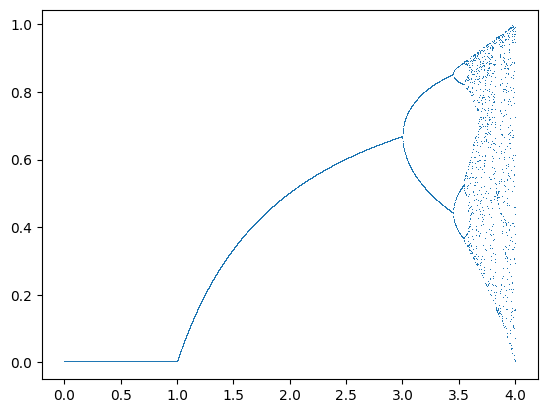

In [213]:
#Exercício 4

import numpy as np
import matplotlib.pyplot as plt

A = np.linspace(0, 4, pow(10,4))
N = 5000
valores = []

for a in A:
    x = np.random.rand()
    for i in range(N):
        x = a * x * (1 - x)

    valores.append(x)

plt.plot(A, valores, ls = '', marker = ',')
plt.show()

In [236]:
class Aresta:
    def __init__(self, no1, no2):  
        self.No1 = no1
        self.No2 = no2

    def NosConectados(self):
        return [self.No1, self.No2]

class No:
    def __init__(self, info):
        self.Arestas = []
        self.Info = info

    def ConectarNo(self, no):
        self.Arestas.append(Aresta(self, no))

    def ArestasConectadas(self):
        return self.Arestas

teste = No(1)
teste2 = No(2)
teste.ConectarNo(teste2)

print(teste, teste2, teste.ArestasConectadas()[0].NosConectados()[0], teste.Info)

TypeError: No.__init__() missing 1 required positional argument: 'info'